In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [5]:
df=pd.read_csv("iris.csv")

In [6]:
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


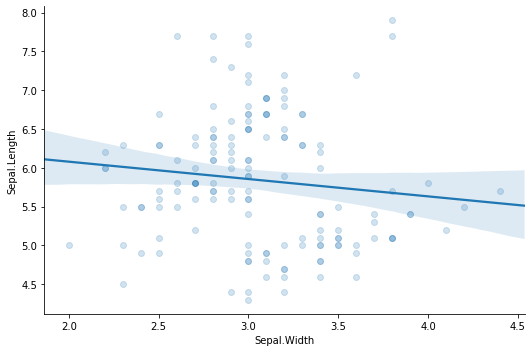

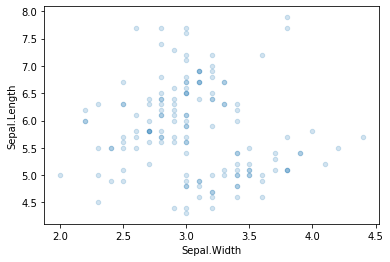

In [7]:
#Explore the relationship between Sepal Length and other independent variables
sns.lmplot(x='Sepal.Width', y='Sepal.Length', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
df.plot(kind='scatter', x='Sepal.Width', y='Sepal.Length', alpha=0.2)

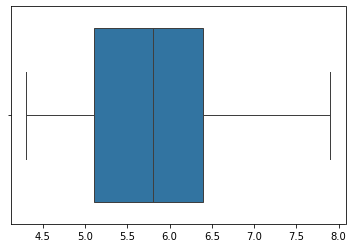

In [8]:
sns.boxplot(df[['Sepal.Length']],data=df,linewidth=1)
plt.show()

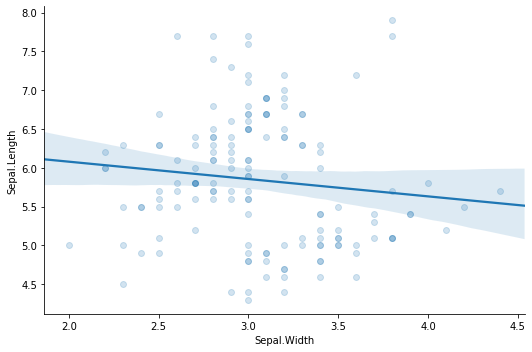

In [9]:
sns.lmplot(x='Sepal.Width', y='Sepal.Length', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

In [10]:
#Checking the relationship between Sepal width and Sepal length
input_cols = ['Sepal.Width']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

[6.52622255]
[[-0.22336106]]


In [11]:
#Checking the relationship between Petal width and Sepal length
input_cols = ['Petal.Width']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

[4.77762942]
[[0.88858025]]


In [12]:
#Checking the relationship between Petal length and Sepal length
input_cols = ['Petal.Length']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

[4.30660342]
[[0.40892228]]


In [13]:
#Checking the relationship between Petal width,Petal Length and Sepal length
input_cols = ['Petal.Width','Petal.Length','Sepal.Width']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

[1.85599749]
[[-0.55648266  0.70913196  0.65083716]]


In [14]:
#Check for multicollinearity
import numpy as np
corr = np.corrcoef(X, rowvar=0)
corr

array([[ 1.        ,  0.96286543, -0.36612593],
       [ 0.96286543,  1.        , -0.4284401 ],
       [-0.36612593, -0.4284401 ,  1.        ]])

In [15]:
print (np.linalg.det(corr))

0.05735702290426796


In [16]:
y=df['Sepal.Length']


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=False)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 3)
(105,)
(45, 3)
(45,)


In [20]:
## Buliding the Linear model with the algorithm
lin_reg=LinearRegression()
model=lin_reg.fit(x_train,y_train)

In [21]:
## Coefficient of determination or R squared value
model.score(x_train,y_train)

0.8823780846396122

In [22]:
print(model.intercept_)
print (model.coef_)

1.816522439340151
[-0.6799173   0.76805423  0.6473215 ]


In [23]:
## Predicting the x_test with the model
predicted=model.predict(x_test)

In [24]:
## RMSE(Root Mean Squared Error)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)))

0.3415062077625562


In [25]:
## R Squared value or coefficient of determination
print(metrics.r2_score(y_test,predicted))

0.7539294801520865


In [26]:
## Mean Absolute Error
print(metrics.mean_absolute_error(y_test,predicted))

0.2720924197284203


In [27]:
#Compute null RMSE
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895])

In [28]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.9287386078235629